In [9]:
import os
import csv
import zipfile
import string
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [13]:
# Set location of file
path = os.path.join("D:/Call_for_service/")
path

'D:/Call_for_service/'

In [16]:
# Get filenames
filenames = os.listdir(path)
filenames

['Calls_for_Service_2012.zip',
 'Calls_for_Service_2013.zip',
 'Calls_for_Service_2014.zip',
 'Calls_for_Service_2015.zip',
 'Calls_for_Service_2016.zip']

In [17]:
# Load data from files in list
dfs = []
for f in filenames:
    zf = zipfile.ZipFile(os.path.join(path,f)) 
    dfs.append(pd.read_csv(zf.open(str.replace(f, 'zip', 'csv')),))

# Merge all df in list
cfs_df = pd.concat(dfs, ignore_index=True)

# Change datatype of column Type_ to String
cfs_df.Type_ = cfs_df.Type_.apply(str)

In [18]:
# Display top 5 rows
cfs_df.head()

,NOPD_Item,Type_,TypeText,Priority,InitialType,InitialTypeText,InitialPriority,MapX,MapY,TimeCreate,...,TimeArrive,TimeClosed,Disposition,DispositionText,SelfInitiated,Beat,BLOCK_ADDRESS,Zip,PoliceDistrict,Location
0,A0000112,62A,"BURGLAR ALARM, SILEN",2C,NaN,NaN,NaN,3683627,532625,1/1/2012 0:00,...,NaN,1/1/2012 0:33,NAT,NECESSARY ACTION TAKEN,NaN,NaN,009XX Decatur St,70116.0,8,"(29.958469303316875, -90.0613152964016)"
1,A0000412,94,DISCHARGING FIREARMS,2B,NaN,NaN,NaN,3732996,562418,1/1/2012 0:00,...,1/1/2012 0:16,1/1/2012 0:30,UNF,UNFOUNDED,NaN,NaN,147XX Chef Menteur Hwy,70129.0,7,"(30.038788769111676, -89.90425047516077)"
2,A0000212,103,DISTURBANCE (OTHER),1C,NaN,NaN,NaN,3687688,548824,1/1/2012 0:01,...,1/1/2012 0:01,1/1/2012 0:19,NAT,NECESSARY ACTION TAKEN,NaN,NaN,038XX Gentilly Blvd,70122.0,3,"(30.002886229898206, -90.04791794333323)"
3,A0000712,21,COMPLAINT OTHER,1H,NaN,NaN,NaN,3670776,521242,1/1/2012 0:01,...,NaN,1/1/2012 0:20,NAT,NECESSARY ACTION TAKEN,NaN,NaN,Carondelet St & Napoleon Ave,70115.0,2,"(29.927555772946167, -90.10228161624175)"
4,A0000512,62A,"BURGLAR ALARM, SILEN",2C,NaN,NaN,NaN,3665739,549621,1/1/2012 0:01,...,1/1/2012 0:09,1/1/2012 1:55,NAT,NECESSARY ACTION TAKEN,NaN,NaN,002XX W Harrison Ave,70124.0,3,"(30.005736477457617, -90.11723146931276)"


In [19]:
cfs_df = cfs_df[cfs_df.Disposition.str.strip() == 'RTF']

In [21]:
# Set location of file
fname = "D:/MAX_CFS_UCR_Categories.xlsx"

# Load file
crime_types = pd.read_excel(fname,sheetname='Sheet1')

# Select required columns
crime_types = crime_types.ix[:,['Code','UCR MAIN','Description']]

# Rename columns
crime_types.rename(columns={'Code':'Type_','UCR MAIN':'CrimeType','Description':'Description'},inplace=True)

# Change datatype of column Type_ to String
crime_types.Type_ = crime_types.Type_.apply(str)
crime_types.Type_ = crime_types.Type_.str.strip()

In [22]:
crime_types = crime_types[crime_types.CrimeType.str.strip() == 'VIOLENT CRIME']

In [23]:
merged_df = pd.merge(cfs_df,crime_types,on='Type_',how='inner')

In [24]:
cfs_final = merged_df[merged_df.CrimeType.notnull()]

In [25]:
cfs_final 

,NOPD_Item,Type_,TypeText,Priority,InitialType,InitialTypeText,InitialPriority,MapX,MapY,TimeCreate,...,Disposition,DispositionText,SelfInitiated,Beat,BLOCK_ADDRESS,Zip,PoliceDistrict,Location,CrimeType,Description
0,A0026112,65,SIMPLE ROBBERY,1B,NaN,NaN,NaN,3680346,531912,1/1/2012 1:44,...,RTF,REPORT TO FOLLOW,NaN,NaN,002XX N Rampart St,70112.0,8,"(29.956608537919635, -90.07170060793311)",VIOLENT CRIME,SIMPLE ROBBERY
1,A0139412,65,SIMPLE ROBBERY,1B,NaN,NaN,NaN,3682307,529905,1/1/2012 20:04,...,RTF,REPORT TO FOLLOW,NaN,NaN,003XX Canal St,70130.0,8,"(29.951030452997887, -90.06557853022184)",VIOLENT CRIME,SIMPLE ROBBERY
2,A0163512,65,SIMPLE ROBBERY,2B,NaN,NaN,NaN,3682519,532977,1/2/2012 0:13,...,RTF,REPORT TO FOLLOW,NaN,NaN,008XX Bourbon St,70116.0,8,"(29.9594709577918, -90.06480175675452)",VIOLENT CRIME,SIMPLE ROBBERY
3,A0195712,65,SIMPLE ROBBERY,1B,NaN,NaN,NaN,3669570,518651,1/2/2012 9:12,...,RTF,REPORT TO FOLLOW,NaN,NaN,009XX Bordeaux St,70115.0,2,"(29.92046691792707, -90.1061762712039)",VIOLENT CRIME,SIMPLE ROBBERY
4,A0248912,65,SIMPLE ROBBERY,1B,NaN,NaN,NaN,3692359,543219,1/2/2012 17:25,...,RTF,REPORT TO FOLLOW,NaN,NaN,030XX Morrice Duncan Dr,70126.0,5,"(29.987329613283705, -90.03336254702)",VIOLENT CRIME,SIMPLE ROBBERY
5,A0268812,65,SIMPLE ROBBERY,1B,NaN,NaN,NaN,3681380,531514,1/2/2012 20:54,...,RTF,REPORT TO FOLLOW,NaN,NaN,Bienville St & Bourbon St,70112.0,8,"(29.955482827774233, -90.06844944722393)",VIOLENT CRIME,SIMPLE ROBBERY
6,A0300912,65,SIMPLE ROBBERY,1B,NaN,NaN,NaN,3682196,528946,1/3/2012 3:14,...,RTF,REPORT TO FOLLOW,NaN,NaN,003XX Poydras St,70130.0,8,"(29.948396903023035, -90.06596250426036)",VIOLENT CRIME,SIMPLE ROBBERY
7,A0581612,65,SIMPLE ROBBERY,1A,NaN,NaN,NaN,3681568,531810,1/5/2012 3:18,...,RTF,REPORT TO FOLLOW,NaN,NaN,008XX Conti St,70112.0,8,"(29.95629101958663, -90.06784548885196)",VIOLENT CRIME,SIMPLE ROBBERY
8,A0678512,65,SIMPLE ROBBERY,1B,NaN,NaN,NaN,3684941,538165,1/5/2012 20:57,...,RTF,REPORT TO FOLLOW,NaN,NaN,016XX Elysian Fields Ave,70117.0,5,"(29.9736622115066, -90.05697117582945)",VIOLENT CRIME,SIMPLE ROBBERY
9,A0704412,65,SIMPLE ROBBERY,1B,NaN,NaN,NaN,3682002,528186,1/6/2012 2:25,...,RTF,REPORT TO FOLLOW,NaN,NaN,Commerce St & Girod St,70130.0,8,"(29.946313057391844, -90.06660157038235)",VIOLENT CRIME,SIMPLE ROBBERY


In [29]:
cfs_final.to_csv('violence_crimes.csv')

In [30]:
# crime_data final version
crime_data = cfs_final[["TimeCreate", "Beat", "Zip", "Description"]]

In [45]:
crime_71109 = crime_data[crime_data.Zip == 70119]

In [46]:
crime_71109

,TimeCreate,Beat,Zip,Description
58,3/2/2012 18:13,NaN,70119.0,SIMPLE ROBBERY
95,4/8/2012 21:27,NaN,70119.0,SIMPLE ROBBERY
100,4/18/2012 9:22,NaN,70119.0,SIMPLE ROBBERY
123,5/9/2012 9:51,NaN,70119.0,SIMPLE ROBBERY
130,5/20/2012 8:09,NaN,70119.0,SIMPLE ROBBERY
153,6/20/2012 2:17,NaN,70119.0,SIMPLE ROBBERY
159,6/30/2012 3:03,NaN,70119.0,SIMPLE ROBBERY
175,7/20/2012 1:43,NaN,70119.0,SIMPLE ROBBERY
178,7/22/2012 7:18,NaN,70119.0,SIMPLE ROBBERY
182,7/27/2012 15:44,NaN,70119.0,SIMPLE ROBBERY


In [36]:
QOL_data = pd.read_csv("D:/311_Calls__2012-Present_.csv")

In [37]:
QOL_data.head(10)

,ticket_id,issue_type,ticket_created_date_time,ticket_closed_date_time,ticket_status,issue_description,street_address,neighborhood_district,council_district,city,state,zip_code,location,geom,latitude,longitude
0,101000514635,Illegal Dumping Reporting,03/08/2016 11:33:41 AM,05/16/2016 11:41:40 AM,Closed,Tires: No | Ch 66: No | Details of items dumpe...,BUCHANAN ST & MILTON ST,ST. BERNARD AREA,D,NEW ORLEANS,LA,70122.0,"(29.9956186639096, -90.0805943549403)",NaN,29.995619,-90.080594
1,101000214475,Tree Service,01/02/2014 02:43:17 PM,03/10/2015 09:27:54 AM,Closed,| Type of Tree: OAK | Branches Hanging: Yes | ...,920 WILSON DR,CITY PARK,A,NEW ORLEANS,LA,70119.0,"(29.9790729872945, -90.0909666218954)",NaN,29.979073,-90.090967
2,101000048763,Code Enforcement General Request,09/04/2012 03:09:52 PM,09/18/2012 11:40:18 AM,Closed,| Unoccupied: Yes | Partly Collapsed: Yes | Tr...,S ALEXANDER ST & CANAL ST,MID-CITY,A,NEW ORLEANS,LA,70119.0,"(29.9768313625105, -90.1041916433695)",NaN,29.976831,-90.104192
3,101000593621,Pothole/Roadway Surface Repair,09/14/2016 09:43:00 AM,09/14/2016 10:05:02 AM,Closed,Street area affected: Travel Lane / Roadway | ...,2900 Dublin St,LEONIDAS,A,NEW ORLEANS,LA,70118.0,"(29.9605592973973, -90.1174956731646)",NaN,29.960559,-90.117496
4,101000077716,Street Flooding/Drainage,11/12/2012 09:26:48 AM,12/07/2012 01:12:33 PM,Closed,"| Is the issue with: Catch Basin | If ""Catch B...",3001 LAFITTE AVE,BAYOU ST. JOHN,A,NEW ORLEANS,LA,70119.0,"(29.9712335225068, -90.0875650763637)",NaN,29.971234,-90.087565
5,101000068932,Residential Recycling Programs,10/17/2012 01:52:37 PM,11/16/2012 12:16:35 PM,Closed,Nature of request: New Recycling Cart,2617 SAGE ST,GENTILLY TERRACE,D,NEW ORLEANS,LA,70122.0,"(29.9939778952121, -90.0489922586574)",NaN,29.993978,-90.048992
6,101000471790,Illegal Dumping Reporting,11/02/2015 09:39:00 AM,12/10/2015 09:45:35 AM,Closed,| Details of items dumped: There are several l...,207 BRUNSWICK CT,OLD AURORA,C,NEW ORLEANS,LA,70131.0,"(29.914881619523, -89.9904324167486)",NaN,29.914882,-89.990432
7,101000048321,Large Item Trash/Garbage Pickup,09/03/2012 10:53:14 AM,12/06/2012 06:29:01 PM,Closed,Description of item: Tree Branches and Trunks ...,315 JOSEPH ST,WEST RIVERSIDE,A,NEW ORLEANS,LA,70115.0,"(29.9166474759959, -90.1180884961856)",NaN,29.916647,-90.118088
8,101000203671,Large Item Trash/Garbage Pickup,11/14/2013 04:01:55 PM,11/15/2013 07:37:38 AM,Closed,Description of item: mattress,4326 JENA ST,BROADMOOR,A,NEW ORLEANS,LA,70125.0,"(29.9491984706621, -90.107425126108)",NaN,29.949198,-90.107425
9,101000180419,Code Enforcement General Request,09/03/2013 11:23:26 AM,09/04/2013 01:24:43 PM,Closed,Occupied: Yes | Urgent matter: No,4308 LAUREL ST,EAST RIVERSIDE,B,NEW ORLEANS,LA,70115.0,"(29.9186095658728, -90.100305853027)",NaN,29.918610,-90.100306


In [38]:
# Quality of life data final version
QOL_data = QOL_data[["ticket_created_date_time", "ticket_closed_date_time", "issue_type", "zip_code"]]

In [42]:
strLight_71109 = QOL_data[(QOL_data.issue_type == "Street Light") & (QOL_data.zip_code == 70119)]

In [127]:
strLight_71109.head(10)

,ticket_created_date_time,ticket_closed_date_time,issue_type,zip_code
45,04/05/2016 09:40:07 AM,06/15/2016 10:04:59 AM,Street Light,70119.0
68,03/21/2014 01:57:56 PM,04/02/2014 01:44:29 PM,Street Light,70119.0
215,09/06/2012 03:13:10 PM,10/16/2013 05:04:28 PM,Street Light,70119.0
221,05/08/2013 02:13:24 PM,07/24/2013 12:32:31 PM,Street Light,70119.0
225,08/07/2013 02:09:29 PM,08/19/2013 04:54:56 PM,Street Light,70119.0
236,08/01/2013 04:00:43 PM,08/19/2013 01:32:15 PM,Street Light,70119.0
286,10/04/2012 02:16:49 PM,11/21/2012 10:12:55 AM,Street Light,70119.0
292,09/03/2012 11:31:24 AM,10/16/2013 05:04:21 PM,Street Light,70119.0
314,10/03/2012 09:30:10 AM,11/21/2012 02:15:31 PM,Street Light,70119.0
438,03/24/2014 03:36:54 PM,01/05/2015 10:35:37 AM,Street Light,70119.0


In [51]:
def getDate(data, col):
    date = pd.to_datetime(data[col])
    year = date.dt.year
    month = date.dt.month
    day = date.dt.day
    Newdate = pd.to_datetime(year*10000 + month*100 + day, format='%Y%m%d')
    return Newdate

In [58]:
# get 3 dates
crime_date = getDate(crime_71109, "TimeCreate")
start_date = getDate(strLight_71109, "ticket_created_date_time")
end_date = getDate(strLight_71109, "ticket_closed_date_time")

In [131]:
# rebuild the dataset
crime_count = pd.DataFrame({'Number': np.repeat(1, crime_71109.shape[0])
                           }, index = crime_date)

light_date = pd.DataFrame({'StartDate': start_date,
                           'EndDate': end_date,
                          }, index = None)

In [125]:
# 14, 15, 16
crime_count = crime_count[(crime_count.index >= '2014-01-01') & (crime_count.index <= '2016-12-31')]
crime_count.head(10)

,Number
TimeCreate,
2014-01-17,1
2014-01-21,1
2014-02-06,1
2014-02-07,1
2014-02-09,1
2014-02-13,1
2014-02-25,1
2014-02-28,1
2014-03-01,1


In [132]:
# 14, 15, 16
light_date = light_date[(light_date.StartDate >= '2014-01-01')  & (light_date.StartDate <= '2016-12-31') &
                         (light_date.EndDate >= '2014-01-01')  & (light_date.EndDate <= '2016-12-31')]
light_date.head(10)

,EndDate,StartDate
45,2016-06-15,2016-04-05
68,2014-04-02,2014-03-21
438,2015-01-05,2014-03-24
472,2016-09-23,2016-09-13
811,2015-04-06,2014-06-23
973,2016-07-14,2016-06-28
1056,2015-04-24,2014-06-23
1085,2016-03-15,2016-03-11
1099,2016-09-07,2016-05-24
1357,2016-11-02,2016-09-13


In [107]:
date1 = dt.strptime(QOL_date.EndDate[1], date_format)

AttributeError: module 'datetime' has no attribute 'strptime'

In [116]:
QOL_date.EndDate.iloc[0]

Timestamp('2016-06-15 00:00:00')

In [120]:
crime_count.index[0] + dt.timedelta(days=-s)

Timestamp('2013-11-07 00:00:00')

In [123]:
id1 = crime_count.index.searchsorted(QOL_date.StartDate.iloc[100])
id2 = crime_count.index.searchsorted(QOL_date.EndDate.iloc[10])
int(sum(crime_count.ix[id1:id2].values))

477

In [117]:
s = (QOL_date.EndDate.iloc[0] - QOL_date.StartDate.iloc[0]).days

In [139]:
def aggregateDateByTimeWin(indicator, crime, startDate, endDate):
    before = []
    during = []
    after = []
    for i in range(len(indicator)):
        duration = (indicator[endDate].iloc[i] - indicator[startDate].iloc[i]).days
        lastStart = crime.index.searchsorted(crime.index[i] - dt.timedelta(days= duration))
        lastEnd = crime.index.searchsorted(indicator[startDate].iloc[i])
        currStart = crime.index.searchsorted(indicator[startDate].iloc[i])
        currEnd = crime.index.searchsorted(indicator[endDate].iloc[i])
        nextStart = crime.index.searchsorted(indicator[endDate].iloc[i])
        nextEnd = crime.index.searchsorted(indicator[endDate].iloc[i] + dt.timedelta(days = duration))
        beforeNum = before.append(int(sum(crime.ix[lastStart:lastStart].values)))
        duringNum = during.append(int(sum(crime.ix[currStart:currEnd].values)))
        afterNum = after.append(int(sum(crime.ix[nextStart:nextEnd].values)))
    return (before, during, after)

In [140]:
before, during, after = aggregateDateByTimeWin(light_date, crime_count, "StartDate", "EndDate")

In [141]:
print(len(before), len(during), len(after))

1291 1291 1291


In [143]:
plot_date = pd.DataFrame({'Time': ["Before"] * len(before) + ["During"] * len(during) + ["After"] * len(after),
                           'Num_Crimes': before + during + after,
                         }, index = None)

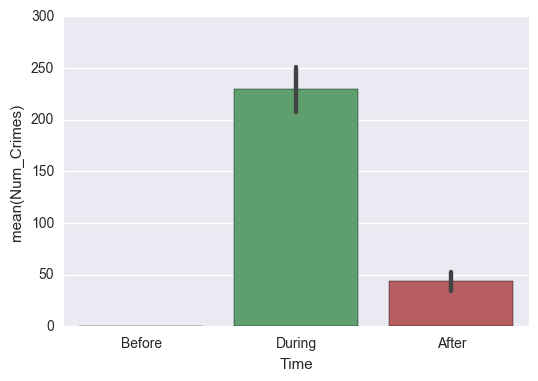

In [154]:
sns.barplot(x="Time", y="Num_Crimes", data=plot_date)

In [152]:
fig = plt.figure(dpi = 100, figsize = (30, 30))
ax.plot = sns.barplot(x="Time", y="Num_Crimes", data=plot_date)
fig.show()

NameError: name 'plt' is not defined

In [149]:
sns.barplot(x="Time", y="Num_Crimes", data=plot_date)

In [151]:
plot_date

,Num_Crimes,Time
0,0,Before
1,0,Before
2,0,Before
3,0,Before
4,0,Before
5,0,Before
6,0,Before
7,0,Before
8,0,Before
9,0,Before


In [74]:
crime_count.iloc[0:10]

,Number
TimeCreate,
2012-03-02,1
2012-04-08,1
2012-04-18,1
2012-05-09,1
2012-05-20,1
2012-06-20,1
2012-06-30,1
2012-07-20,1
2012-07-22,1


In [87]:
QOL_date.iloc[(len(QOL_date) - 5): (len(QOL_date) - 4), 0:1].values

array([['NaT']], dtype='datetime64[ns]')

In [104]:
QOL_date[QOL_date.EndDate == 'NaT']

,EndDate,StartDate


In [68]:
QOL_date[QOL_date.notnull()]

,EndDate,StartDate
45,2016-06-15,2016-04-05
68,2014-04-02,2014-03-21
215,2013-10-16,2012-09-06
221,2013-07-24,2013-05-08
225,2013-08-19,2013-08-07
236,2013-08-19,2013-08-01
286,2012-11-21,2012-10-04
292,2013-10-16,2012-09-03
314,2012-11-21,2012-10-03
438,2015-01-05,2014-03-24


In [ ]:
crime_count = pd.DataFrame({'Number': np.repeat(1, stop_search.shape[0]),
                            'Date': crime_date,
                           }, index = None)

In [ ]:
# count the number of crimes within each day
crime_date = pd.to_datetime(stop_search['TimeCreate'])
year = crime_date.dt.year
month = crime_date.dt.month
day = crime_date.dt.day
crime_date = pd.to_datetime(year*10000 + month*100 + day, format='%Y%m%d')

crime_count = pd.DataFrame({'Number': np.repeat(1, stop_search.shape[0]),
                            'Date': crime_date,
                           }, index = None)

crime_sum = crime_count.groupby(['Date'])['Number'].sum()
crime_sum = pd.DataFrame(crime_sum)